In [56]:
import pandas as pd
import numpy as np

In [61]:
import os

os.getcwd()

'/Users/haeinpark/Projects'

In [62]:
os.chdir('./Data_Science_Projects/Titanic_Survival')
os.getcwd()

'/Users/haeinpark/Projects/Data_Science_Projects/Titanic_Survival'

In [63]:
for root, dirs, files in os.walk('./data'):
    for file in files:
        print(os.path.join(root, file))

./data/test.csv
./data/train.csv
./data/gender_submission.csv


In [64]:
# Load data

train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
# Women V.S. Men

women = train_data[train_data.Sex == 'female']['Survived']

rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [67]:
men = train_data[train_data.Sex == 'male']['Survived']

rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [68]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

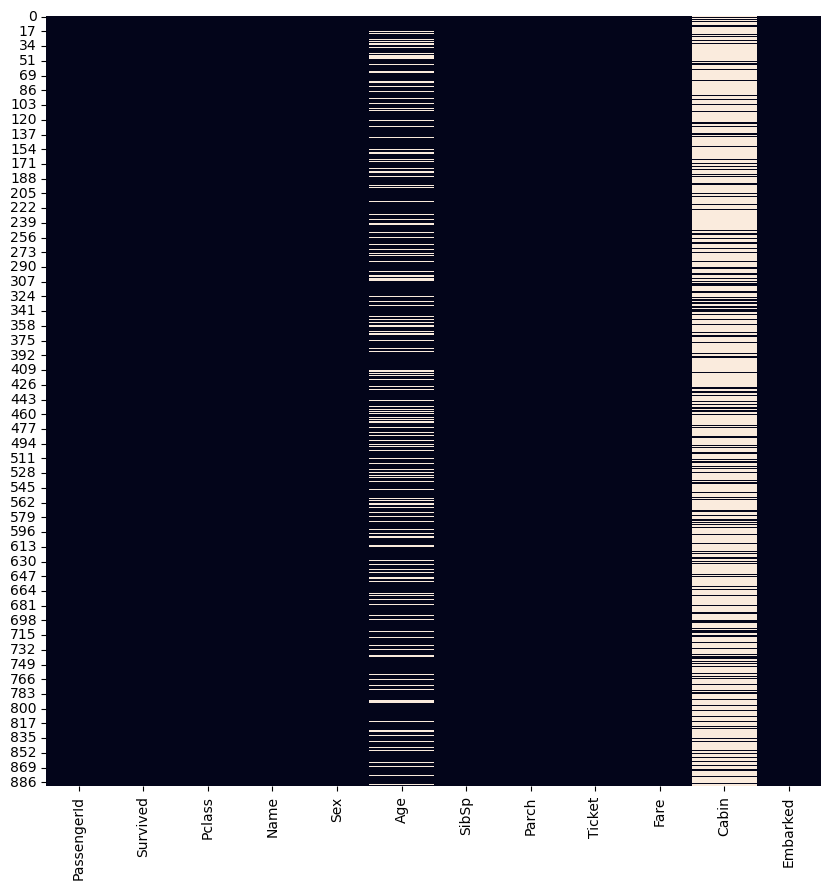

(889, 12)


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

drop_na_train_data = train_data.dropna(subset='Embarked')
sns.heatmap(drop_na_train_data.isnull(), cbar=False)

plt.show()

print(drop_na_train_data.shape)


In [70]:
from sklearn.preprocessing import OneHotEncoder

drop_na_train_data = train_data.dropna(subset='Embarked')

ohenc = OneHotEncoder(drop='first', sparse_output=False)

target_df = drop_na_train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].select_dtypes(include=('object', 'category'))

transformed = ohenc.fit_transform(target_df)

# ohenc.get_feature_names_out()

transformed_df = pd.DataFrame(data=transformed, columns=ohenc.get_feature_names_out())

print(transformed)
transformed_df.head()

[[1. 0. 1.]
 [0. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 1. 0.]]


,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0


In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Target Features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
target_df = drop_na_train_data[features]
y_train = drop_na_train_data['Survived']

# Get the list of interested columns
categorical_columns = target_df.select_dtypes(include=['object', 'category']).columns.to_list()
numerical_columns = target_df.select_dtypes(include='number').columns.to_list()

# Column Transformer
column_trans = ColumnTransformer(
    [
        ('categories', OneHotEncoder(drop='first', sparse_output=False, dtype='int'), categorical_columns),
        ('numerical', StandardScaler(), numerical_columns)
    ],
    remainder='drop',  # When 'drop', the unspecified features will not be returned
    verbose_feature_names_out=False  # When True, the prefix of the features will be the name of the transformer
    # sparse_threshold=1
)

no_y_df = drop_na_train_data.drop(columns=['Survived'])

column_trans.fit(no_y_df)

data = column_trans.transform(no_y_df)

X_train = pd.DataFrame(data=data, columns=column_trans.get_feature_names_out())

X_train.head()

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch
0,1.0,0.0,1.0,0.825209,-0.527669,0.431350,-0.474326
1,0.0,0.0,0.0,-1.572211,0.577094,0.431350,-0.474326
2,0.0,0.0,1.0,0.825209,-0.251478,-0.475199,-0.474326
3,0.0,0.0,1.0,-1.572211,0.369951,0.431350,-0.474326
4,1.0,0.0,1.0,0.825209,0.369951,-0.475199,-0.474326


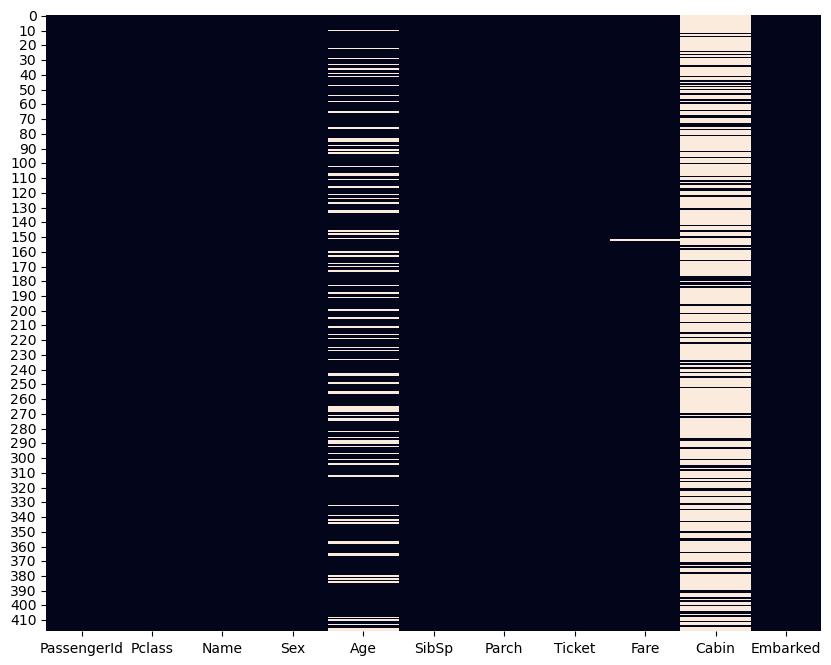

In [73]:
plt.figure(figsize=(10, 8))

sns.heatmap(test_data.isnull(), cbar=False)

plt.show()

In [81]:
transformed_df = column_trans.transform(test_data)

X_test = pd.DataFrame(transformed_df, columns=column_trans.get_feature_names_out())

X_test.head()

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch
0,1.0,1.0,0.0,0.825209,0.335427,-0.475199,-0.474326
1,0.0,0.0,1.0,0.825209,1.198523,0.431350,-0.474326
2,1.0,1.0,0.0,-0.373501,2.234238,-0.475199,-0.474326
3,1.0,0.0,1.0,0.825209,-0.182430,-0.475199,-0.474326
4,0.0,0.0,1.0,0.825209,-0.527669,0.431350,0.765897


In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv')

print("Your Submission was Successfully Saved!")

Your Submission was Successfully Saved!
